# Data Mess Around 
For Taipei Real Estate Data

In [74]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn import preprocessing 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer 
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn.neural_network import MLPClassifier,MLPRegressor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import svm
from sklearn.model_selection import KFold,LeaveOneOut, RandomizedSearchCV

In [66]:
data = pd.read_csv("taipei_train.csv")
data.head()

,district,total_ntd,land_area,main_building_material,building_area,num_room,num_hall,num_toilet,transaction_year,transaction_month,building_age
0,Xinyi District,79800000,527.00,Reinforced concrete construction,476.97,10,3,4,2019,9,1944.0
1,Wenshan District,15600000,46.77,Reinforced concrete construction,128.58,10,0,10,2019,10,1947.0
2,Neihu District,19000000,37.84,Reinforced concrete construction,148.65,9,0,9,2019,11,1949.0
3,Zhongshan Area,11500000,22.40,Reinforced concrete construction,75.96,7,0,7,2019,9,1951.0
4,Zhongshan Area,13980000,24.00,Reinforced concrete construction,73.75,7,2,3,2019,11,1951.0


In [65]:
data.describe()

,total_ntd,land_area,building_area,num_room,num_hall,num_toilet,transaction_year,transaction_month,building_age
count,1.587000e+03,1587.000000,1587.000000,1587.000000,1587.000000,1587.000000,1587.000000,1587.000000,1587.000000
mean,1.595045e+07,26.402817,93.484726,2.666037,1.663516,1.595463,2018.994959,10.686200,1945.056588
std,1.065980e+07,29.642330,42.998593,1.094236,0.592256,0.790983,0.117669,1.194177,15.777181
min,1.382000e+04,0.030000,0.130000,1.000000,0.000000,0.000000,2015.000000,2.000000,1908.000000
25%,9.750000e+06,14.565000,64.610000,2.000000,1.000000,1.000000,2019.000000,10.000000,1939.816666
50%,1.400000e+07,24.750000,91.320000,3.000000,2.000000,1.000000,2019.000000,11.000000,1947.000000
75%,1.941500e+07,32.610000,115.305000,3.000000,2.000000,2.000000,2019.000000,12.000000,1954.000000
max,2.300000e+08,717.540000,526.690000,10.000000,5.000000,10.000000,2019.000000,12.000000,2019.000000


In [55]:
def dataClean(data):
    ind = pd.get_dummies(data, columns = ['district','main_building_material','transaction_year']).drop(['total_ntd'],axis = 1)
    ind[['building_age']] = 2022-ind[['building_age']]
    return ind 

In [56]:
ind = dataClean(data)

<AxesSubplot:>

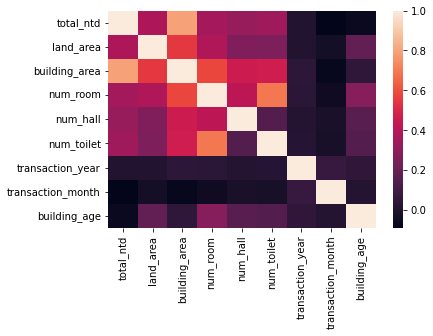

In [57]:
data.corr()
sns.heatmap(data.corr())

In [58]:
dep = data[['total_ntd']]
#ind = data[['land_area','building_area','num_room','num_hall','num_toilet','building_age']]
#ind2 = pd.get_dummies(data, columns=['district','main_building_material']).drop(['total_ntd'],axis = 1)
#ind2.head()


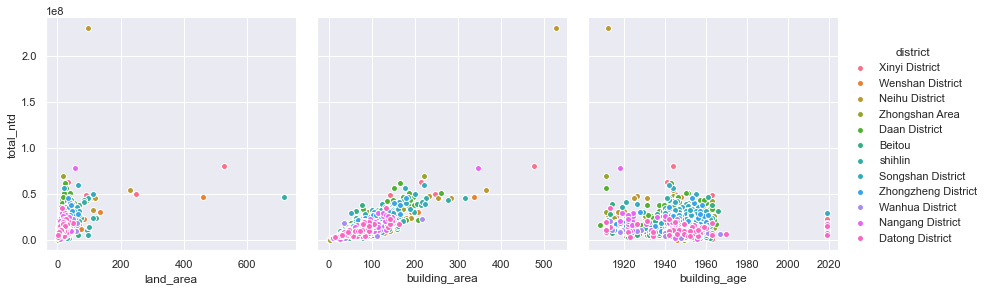

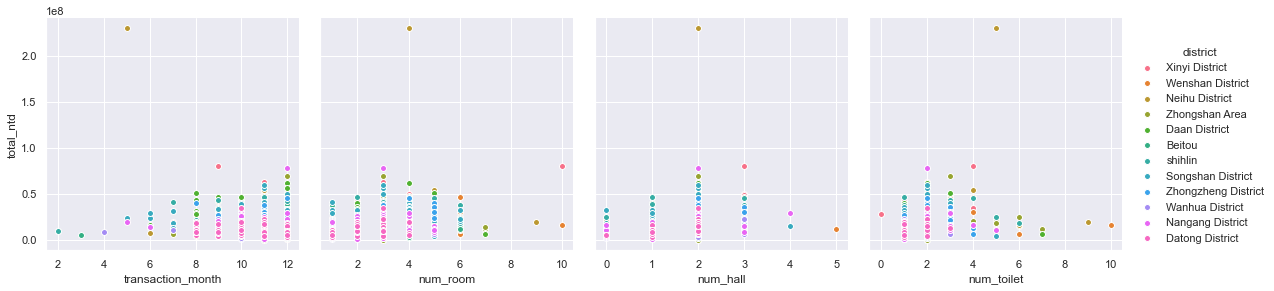

In [107]:
hue = "district"
g = sns.PairGrid(data, y_vars = ['total_ntd'], x_vars = ['land_area','building_area','building_age'], hue = hue,height=4)
g.map(plt.scatter,edgecolor="white")
#g.map(sns.kdeplot,legend=False)
g.add_legend()
g1 = sns.PairGrid(data, y_vars = ['total_ntd'], x_vars = ['transaction_month','num_room','num_hall','num_toilet'],hue = hue, height = 4)
g1.map(plt.scatter, edgecolor = "white")
g1.add_legend()

#g3 = sns.joinplot(

In [60]:
X_train, X_test,y_train,y_test = train_test_split(ind,dep,test_size=0.2,random_state=0)

In [61]:
ml = LinearRegression()
clf_ml = ml.fit(X_train,y_train)
clf_ml.score(X_test,y_test)

0.6958529861950988

In [62]:
ml2 = LinearRegression()
scores = cross_val_score(ml2, ind2, dep, cv = 10)
print(scores)

[0.74448964 0.64527551 0.53595612 0.61745993 0.63765806 0.76426843
 0.76783541 0.45402576 0.1046656  0.59752958]
